In [1]:
%matplotlib inline
import numpy as np
from figures import single_time_point_decoding_vs_binary_weight_matrix as fig_1
from figures import single_time_point_decoding_vs_nary_weight_matrix as fig_2
from figures import single_time_point_decoding_vs_nary_weights_fixed_g_d as fig_2_1
from figures import spontaneous_vs_driven_dkl as fig_3

How is stimulus decodability affected when the network's connectivity mirrors the external stimulus transitions? To ask this,  first imagine that activation-dependent hyperexcitability has been switched off by some global mechanism such as neuromodulation. Indeed, early working memory studies showed that stimulus-repetition-dependent hyperexcitability could be gated by task-relevant variables ([Miller et al., 1994][Miller1994]). Further since hyperexcitability shifts a decoder readout towards previous stimuli, it would make sense to turn this off in order to read out current stimuli.

Next imagine a Markovian stimulus that transitions among a discrete set of states over time according to the probability $P(S_t = s_i|S_{t-1} = s_j)$, with one state corresponding to each ensemble. The network's activation $A_t$ is determined by both the previous activation and the incoming stimulus according to $P(A_t = i|A_{t-1}, S_t)$. That is, both the network and the stimulus transition through parallel sets of states, with the stimulus partially influencing the network's transitions, as in the figure below:

<img src="files/images/network_and_stimulus_transitions_unmatched.png" width="300px"/>

Now imagine a decoder that at each time step simply chooses the stimulus corresponding to the active ensemble (e.g., if ensemble 84 was active, the readout of the decoder is *stimulus 84*). How is the decoding accuracy (the probability that the decoder is correct, averaged over time) affected when the network transitions mirror the stimulus transitions, as in the diagram below?

<img src="files/images/network_and_stimulus_transitions_matched.png" width="300px"/>

At a given time step, there are two cases to consider. On the one hand, if the last active ensemble *matched* the last stimulus, decoding should improve. This is because downstream ensembles receiving increased input from the last active ensemble will tend to line up with likely stimuli, since the connectivity mirrors the stimulus transitions. On the other hand, if the last active ensemble *did not match* the last stimulus, decoding should worsen. This is because the downstream ensembles receiving increased input will have little to do with the current stimulus, thereby shifting activation probability mass on average away from the ensemble corresponding to the correct stimulus.

[Miller1994]: http://science.sciencemag.org/content/263/5146/520

Below we consider 5 different connectivity structures, relative to the stimulus transition probabilities: (1) connectivity matched to the stimulus transitions, (2) zero connectivity, (3) connectivity half-matched to the stimulus transitions and half zero, (4) random connectivity, and (5) full connectivity. To choose a stimulus transition matrix that is easily matchable by a connectivity matrix, we build the connectivity matrix $W_{matched}$ first, and then calculate the corresponding transition probabilities using the softmax function to $P(S_t|S_{t-1})$.

In [16]:
CONFIG = {
    'SEED': 0,  # FOR RANDOM NUMBER GENERATOR
    
    'N_NODES': 100,  # NUMBER OF NODES
    'P_CONNECT': .2,  # ERDOS-RENYI CONNECTION PROBABILITY
    
    'G_W': 5,  # GAIN ON PROJECTION WEIGHTS (ALL W_IJ ARE 1 OR 0)
    'G_DS': np.linspace(0, 10, 20, endpoint=True),  # GAINS ON STIMULUS DRIVE
    'G_D_EXAMPLE': 4,  # STIMULUS DRIVE GAIN FOR EXAMPLE DECODING
    'N_TIME_POINTS': 3000,  # NUMBER OF TIME POINTS TO DECODE
    'N_TIME_POINTS_EXAMPLE': 300,
    
    'DECODING_SEQUENCE_LENGTHS': [1, 2],
    
    'FIG_SIZE': (15, 8),
    'COLORS': ['k', 'b', 'g', 'r', 'c'],
    'FONT_SIZE': 16,
}

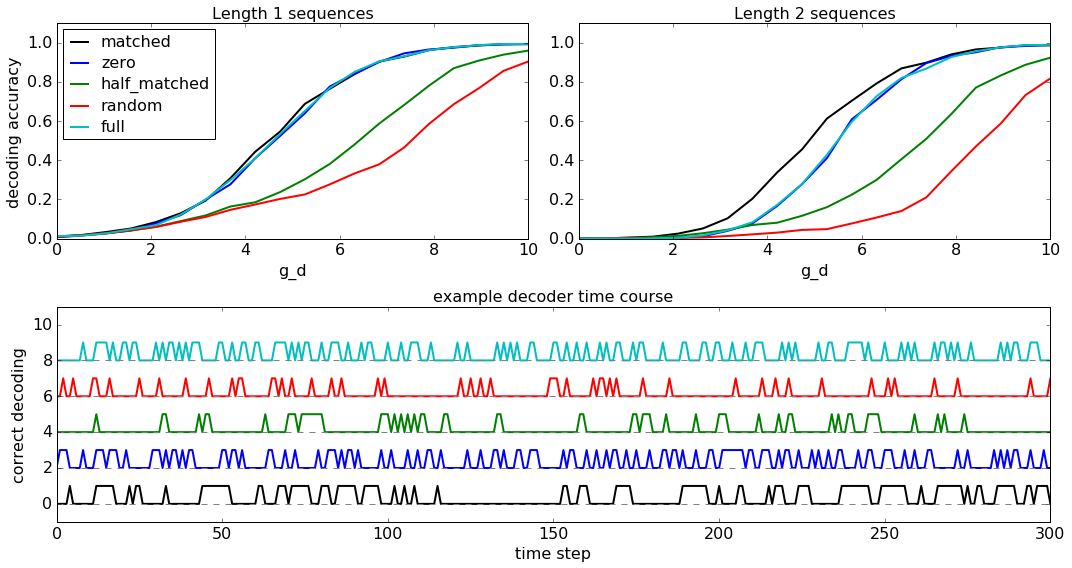

In [17]:
fig_1(**CONFIG)

#### Figure 1: Stimulus decodability depends on the relationship between the network connectivity and the stimulus transition probabilities

Interestingly, we see that whereas decoding accuracy is significantly impaired when the connectivity is random or only half matches the stimulus transitions, the accuracy is equal for zero connectivity, full connectivity, and connectivity precisely matched to the stimulus transitions. Thus, the effects of the two possible cases described above (which improve and worsen stimulus decodability, respectively) seem to exactly cancel out in our model.

In [18]:
CONFIG = {
    'SEED': 0,  # FOR RANDOM NUMBER GENERATOR
    
    'N_NODES': 100,  # NUMBER OF NODES
    'P_CONNECT': .2,  # ERDOS-RENYI CONNECTION PROBABILITY
    'STRENGTHS': [1, 2, 3, 4],  # POSSIBLE CONNECTION STRENGHTS
    'P_STRENGTHS': [.25, .25, .25, .25],  # PROBABILITY OF SELECTING EACH CONNECTION STRENGTH
    
    'G_W': 3,  # GAIN ON PROJECTION WEIGHTS (ALL W_IJ ARE 1 OR 0)
    'G_DS': np.linspace(0, 10, 20, endpoint=True),  # GAINS ON STIMULUS DRIVE
    'G_D_EXAMPLE': 5,  # STIMULUS DRIVE GAIN FOR EXAMPLE DECODING
    'N_TIME_POINTS': 3000,  # NUMBER OF TIME POINTS TO DECODE
    'N_TIME_POINTS_EXAMPLE': 300,
    
    'DECODING_SEQUENCE_LENGTHS': [1, 2, 3],
    
    'FIG_SIZE': (15, 12),
    'COLORS': ['k', 'b', 'g', 'r', 'c'],
    'FONT_SIZE': 16,
}

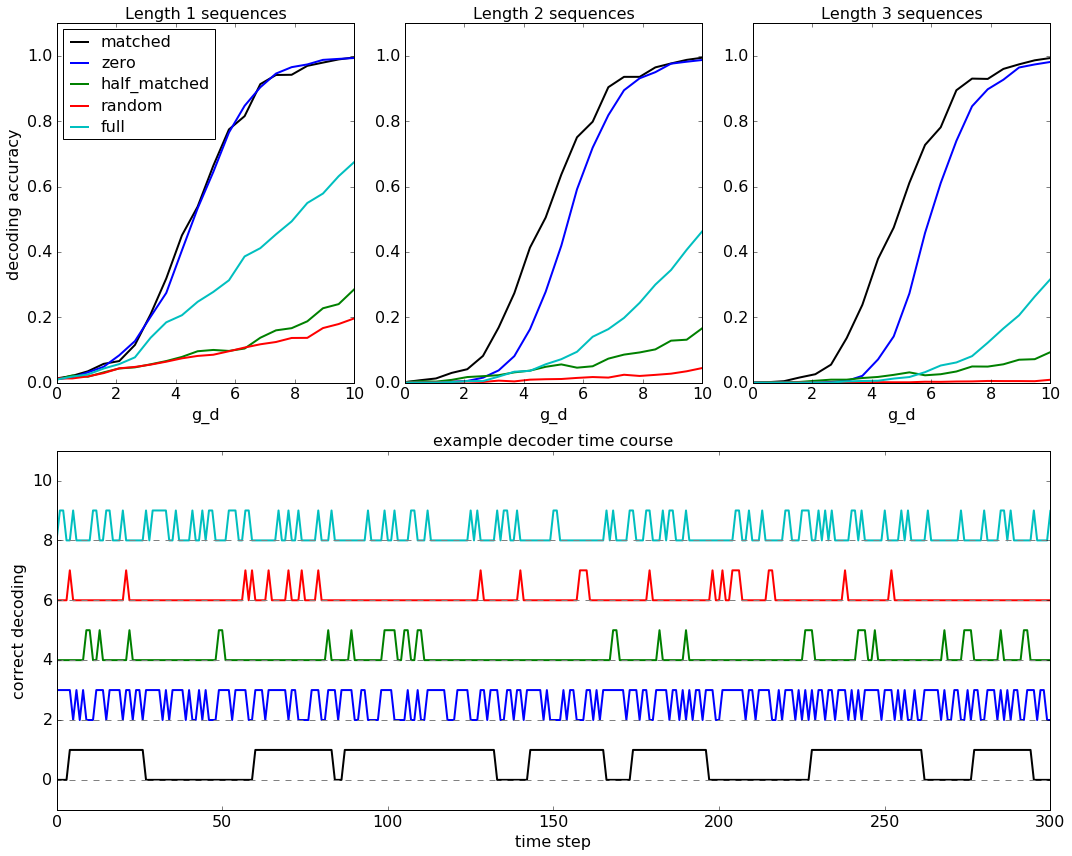

In [19]:
fig_2(**CONFIG)

#### Figure 2: Same as Figure 1 but for non-binary weight matrix
Once again, we see that when when the weight matrix matches the stimulus probability transitions, we get the same decodability as when there are no connections. However, when we try to decode sequences of length > 1, we matched network significantly outperforms the zero-weight network.

In [2]:
CONFIG = {
    'SEED': 0,  # FOR RANDOM NUMBER GENERATOR
    
    'N_NODES': 100,  # NUMBER OF NODES
    'P_CONNECT': .2,  # ERDOS-RENYI CONNECTION PROBABILITY
    'STRENGTHS': [1, 2],  # POSSIBLE CONNECTION STRENGHTS
    'P_STRENGTHS': [.5, .5],  # PROBABILITY OF SELECTING EACH CONNECTION STRENGTH
    
    'G_W': 5,  # GAIN ON PROJECTION WEIGHTS (ALL W_IJ ARE 1 OR 0)
    'G_D': 5,  # STIMULUS DRIVE GAIN FOR DECODING
    'N_TIME_POINTS': 3000,  # 00,  # NUMBER OF TIME POINTS TO DECODE
    'N_TRIALS': 50,
    'N_TIME_POINTS_EXAMPLE': 300,
    
    'DECODING_SEQUENCE_LENGTHS': [1, 2, 3],
    
    'FIG_SIZE': (15, 8),
    'MARKER_SIZE': 50,
    'VISUAL_SCATTER': 0.02,
    'COLORS': ['k', 'b', 'g', 'r'],
    'FONT_SIZE': 16,
}

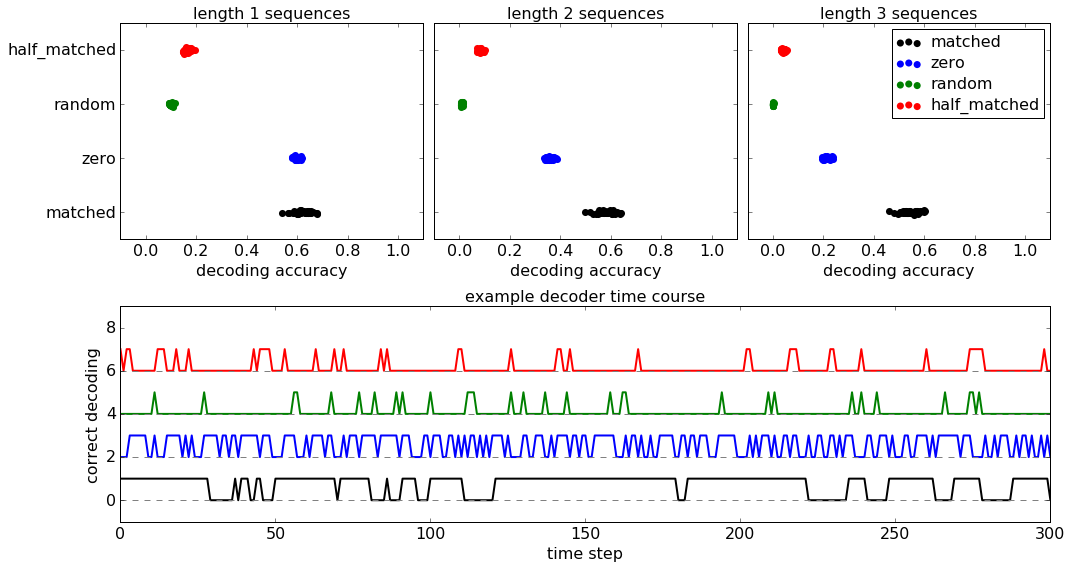

In [3]:
fig_2_1(**CONFIG)

#### Figure 2.1 Multiple trials for specific stimulus and weight gain
This shows that the matched network has higher variability in its decoding accuracy, but it is still significantly better than the zero-weight network.

By studying the spontaneous activity and natural-scene-driven activity in the ferret visual cortex, [Berkes et al. (2011)][Berkes2011] made the observation that over the course of development, the distributions of spontaneous vs. natural-scene-driven activity became more similar to one another, which suggested that the brain was learning a "model" of the external environment, which it could then access even when external stimuli were not present.

Below, we show that in our model, the similarity between spontaneous activity distribution and stimulus-driven activity distribution is minimized when the spontaneous distribution matches the stimulus distribution (see diagram below). Obviously, because of how we have constructed our "matched" model, the spontaneous activity distribution will be statistically equal to the stimulus-driven activity distribution when the stimulus is strong enough to force activation to follow it exactly. This is because in the latter case the driven activation distribution will be exactly equal to the stimulus distribution, which is by construction equal to the spontaneous activation distribution. What we focus on is the alternative case in which the stimulus is not strong enough to force activation to follow it exactly, i.e., in which activation depends on both the current stimulus and the previous activation state.

<img src="files/images/spontaneous_vs_driven_activity_diagram.png" width="600px"/>

To do this we calculate the DKL between the spontaneous activity distribution and the sampled stimulus-driven activity distribution, for both time-averaged state probabilities as well as time-averaged state-transition probabilities.

In doing so we show that when the spontaneous activity distribution exactly matches the stimulus distribution, it also exactly matches the stimulus-driven activity distribution, regardless of the strength of the driving stimulus. Further, we show a that the network with stimulus-matched weights will only show a lower DKL(spontaneous activity, stimulus-driven activity) than the network with random weights in the regime where the influence of the stimulus is larger ($g_d$) than the influence of the previous network state ($g_w$).

[Berkes2011]: http://science.sciencemag.org/content/331/6013/83.abstract?sid=b92e7a61-01c8-4d7f-9061-eabae96868ab

In [12]:
CONFIG = {
    'SEED': 0,  # FOR RANDOM NUMBER GENERATOR
    
    'N_NODES': 100,  # NUMBER OF NODES
    'P_CONNECT': .2,  # ERDOS-RENYI CONNECTION PROBABILITY
    'STRENGTHS': [1],  # POSSIBLE CONNECTION STRENGTHS
    'P_STRENGTHS': [1],  # PROBABILITY OF SELECTING EACH CONNECTION STRENGTH
    
    'G_W': 5,  # GAIN ON PROJECTION WEIGHTS (ALL W_IJ ARE 1 OR 0)
    'G_DS': np.linspace(0, 10, 20, endpoint=True),  # GAINS ON STIMULUS DRIVE
    'N_TIME_POINTS': 20000,  # NUMBER OF TIME POINTS TO DECODE
    
    'FIG_SIZE': (15, 8),
    'COLORS': ['k', 'b', 'g', 'r', 'c'],
    'FONT_SIZE': 16,
}

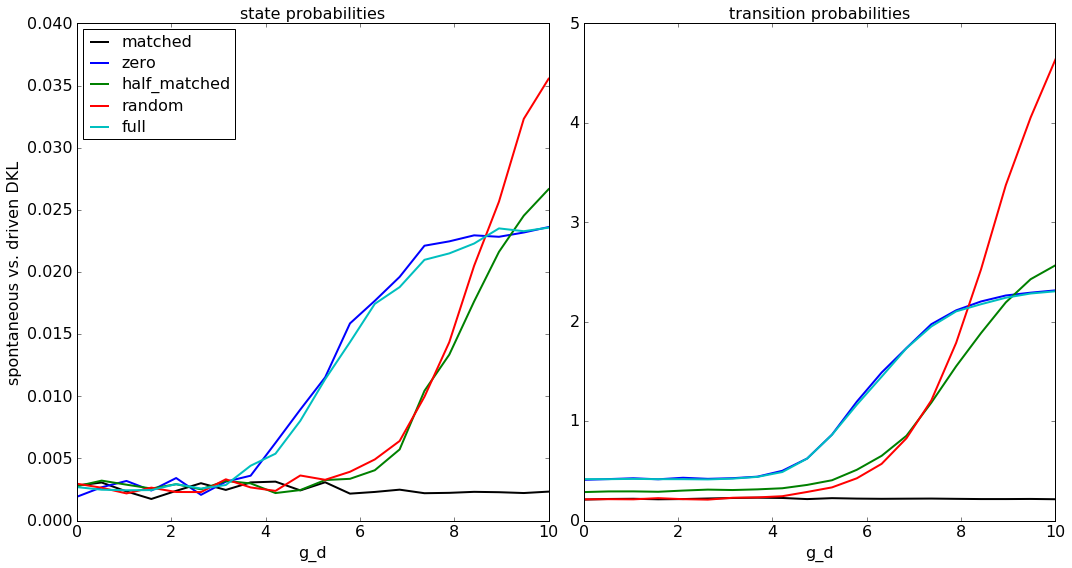

In [13]:
fig_3(**CONFIG)